# ***Project Overview***

Foodpanda’s success depends not only on attracting new users but also on retaining its existing customer base. Customer acquisition can be costly, so improving retention and encouraging repeat orders directly contributes to higher lifetime value and sustainable growth. This project focuses on analyzing customer behavior to understand the main drivers of churn and building a predictive model to identify customers who are most at risk of leaving. By doing so, Foodpanda can implement targeted campaigns, loyalty programs, and personalized offers to strengthen customer relationships and reduce churn rates.

---

# Dataset Summary
The dataset used in this project comes from [Kaggle: Foodpanda Analysis Dataset 2025](https://www.kaggle.com/datasets/nabihazahid/foodpanda-analysis-dataset-2025).  
It contains **6,000 records** of Foodpanda customers, including demographic details (gender, age, city), order-level information (restaurant, dish, category, price, quantity), behavioral features (order frequency, recency, loyalty points), and experience-related attributes (delivery status, ratings, payment method).  
The dataset also includes a churn label indicating whether a customer is **active** or **inactive**, making it suitable for churn analysis, predictive modeling, and optimization-based decision-making.

---

## ***Business Objectives***

The primary objective of this project is to help Foodpanda reduce churn and boost customer loyalty. We aim to uncover the key factors that influence whether a customer stays active or becomes inactive, such as ordering patterns, loyalty points, payment methods, or delivery experiences. Using these insights, we will build a churn prediction model that not only classifies customers into risk categories but also provides clear guidance for business action. The ultimate goal is to empower decision-makers with data-driven strategies to retain valuable customers, allocate marketing resources more efficiently, and improve overall profitability.

---

## ***Key Questions***

1. What customer factors (orders, loyalty points, delivery experience) are most linked to churn?

2. Which customers should be prioritized for retention campaigns?

3. How much can targeted interventions improve loyalty compared to the current approach?

# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset
df = pd.read_csv("Foodpanda Analysis Dataset.csv")

In [5]:
# Preview shape & first rows
print("Shape:", df.shape)
df.head()

Shape: (6000, 20)


,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [7]:
df.isnull().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

In [8]:
# Target column = 'churned'
df['churned'].value_counts(normalize=True) * 100

churned
Active      50.266667
Inactive    49.733333
Name: proportion, dtype: float64

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,6000,6000,C5663,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,6000,3,Female,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,6000,3,Teenager,2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,6000,5,Multan,1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signup_date,6000,730,10/18/2023,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,6000,6000,O9663,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,6000,730,9/8/2024,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,6000,5,Subway,1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dish_name,6000,5,Pasta,1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,6000,5,Italian,1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Demographic**

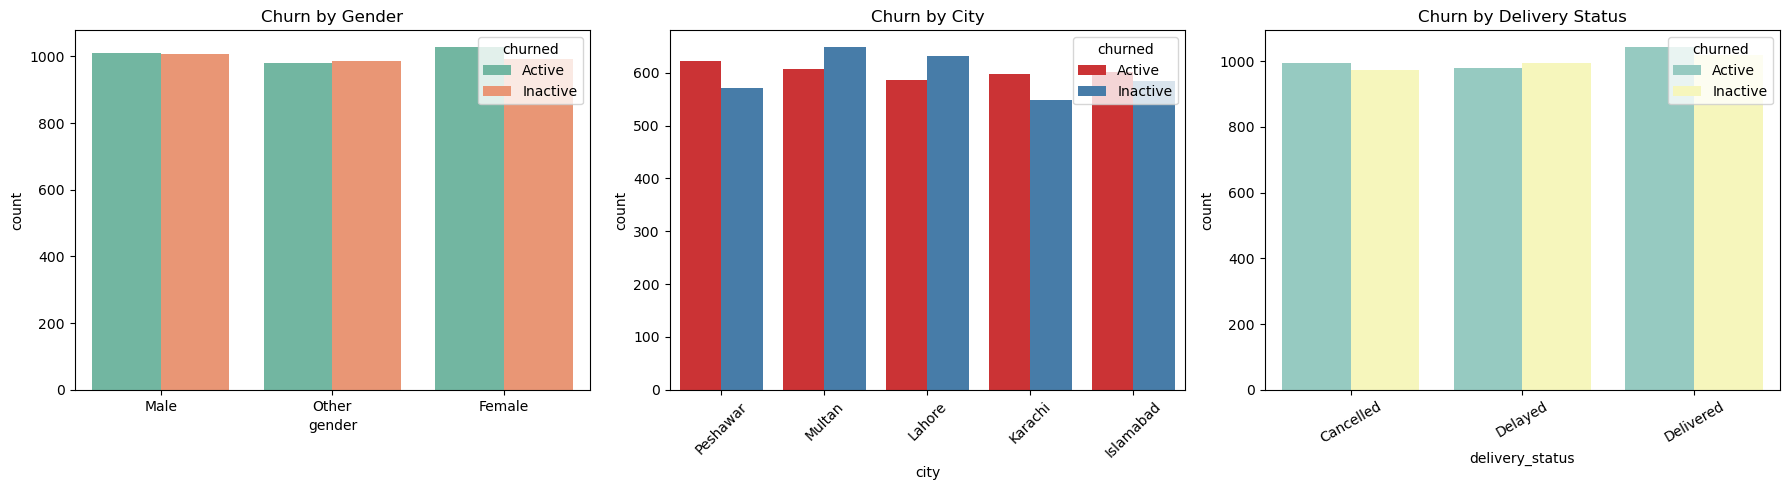

In [11]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs Churn
sns.countplot(x='gender', hue='churned', data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Churn by Gender")

# City vs Churn
sns.countplot(x='city', hue='churned', data=df, palette="Set1", ax=axes[1])
axes[1].set_title("Churn by City")
axes[1].tick_params(axis='x', rotation=45)

# Delivery Status vs Churn
sns.countplot(x='delivery_status', hue='churned', data=df, palette="Set3", ax=axes[2])
axes[2].set_title("Churn by Delivery Status")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

**Behavioral Metrics**

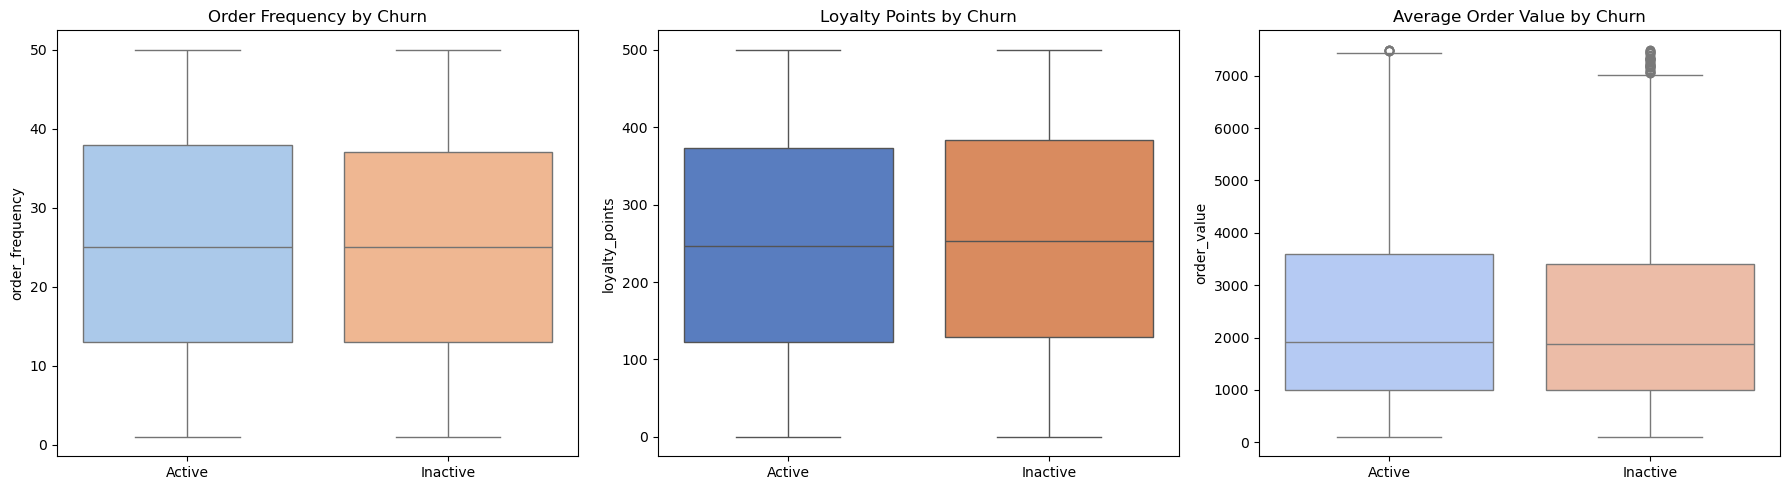

,order_frequency,loyalty_points,order_value
churned,,,
Active,25.482095,248.228448,2410.887623
Inactive,25.125335,252.139745,2370.199400


In [13]:
# Order Value
df['order_value'] = df['price'] * df['quantity']

# Create figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Order Frequency
sns.boxplot(x='churned', y='order_frequency', data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Order Frequency by Churn")
axes[0].set_xlabel("")

# Loyalty Points
sns.boxplot(x='churned', y='loyalty_points', data=df, palette="muted", ax=axes[1])
axes[1].set_title("Loyalty Points by Churn")
axes[1].set_xlabel("")

# Average Order Value
sns.boxplot(x='churned', y='order_value', data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Average Order Value by Churn")
axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

# Quick summary stats
df.groupby('churned')[['order_frequency','loyalty_points','order_value']].mean()

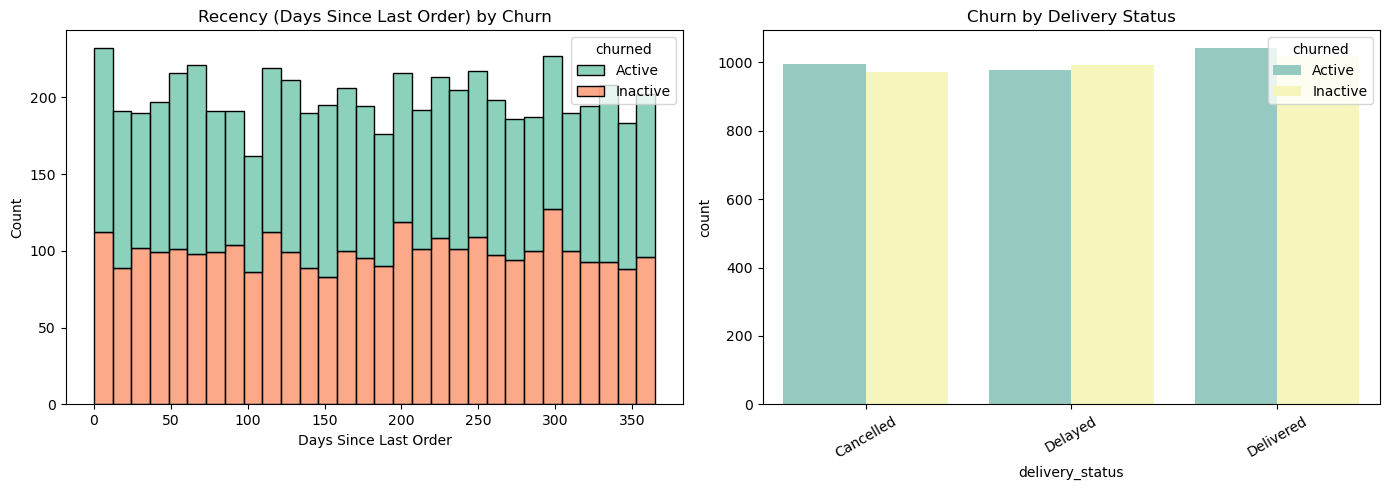

(churned
 Active      180.986406
 Inactive    182.359920
 Name: recency_days, dtype: float64,
 churned          Active  Inactive
 delivery_status                  
 Cancelled           996       972
 Delayed             978       994
 Delivered          1042      1018)

In [40]:
# --- Recency Analysis & Delivery Experience ---

# Ensure last_order_date is datetime
df['last_order_date'] = pd.to_datetime(df['last_order_date'], errors='coerce')

# Detect dataset's most recent date (dynamic, no hard coding)
max_date = df['last_order_date'].max()

# Create recency in days
df['recency_days'] = (max_date - df['last_order_date']).dt.days

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Recency distribution by churn
sns.histplot(data=df, x="recency_days", hue="churned", kde=False,
             bins=30, palette="Set2", multiple="stack", ax=axes[0])
axes[0].set_title("Recency (Days Since Last Order) by Churn")
axes[0].set_xlabel("Days Since Last Order")

# 2. Delivery status vs churn
sns.countplot(x="delivery_status", hue="churned", data=df, palette="Set3", ax=axes[1])
axes[1].set_title("Churn by Delivery Status")
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Group stats for business insight
recency_summary = df.groupby('churned')['recency_days'].mean()
delivery_summary = df.groupby(['delivery_status','churned']).size().unstack(fill_value=0)

recency_summary, delivery_summary

## 📊 EDA Summary & Business Insights

### 1. Customer Behavior
- **Order Frequency:** Active customers place an average of **25.48 orders**, while inactive customers average **25.13 orders** → almost identical.  
- **Loyalty Points:** Actives average **248 points**, inactives average **252 points** → loyalty points do not appear to influence churn.  
- **Order Value:** Actives spend about **2,411 PKR** per order on average, vs **2,370 PKR** for inactives → a very small difference.  
➡️ **Transactional behavior (frequency, spend, loyalty points) is not a strong churn signal.**

### 2. Customer Demographics
- **Gender:** Churn rates are balanced across Male, Female, and Other, each with around **1,000 customers**.  
- **City:** Multan is the largest market (**1,256 customers**), but churn rates are similar across all 5 cities.  
➡️ **Demographics (gender, city) do not explain churn.**

### 3. Customer Experience
- **Delivery Status:**  
  - Cancelled → **996 Active vs 972 Inactive**  
  - Delayed → **978 Active vs 994 Inactive**  
  - Delivered → **1,042 Active vs 1,018 Inactive**  
  ➡️ Churn rates are fairly close across categories, meaning **delivery status alone is not decisive**, though repeated cancellations or delays may still impact satisfaction.  
- **Ratings:** Average customer rating is **3.0/5**, suggesting **moderate satisfaction but not strong loyalty.**

### 4. Recency
- **Days Since Last Order:**  
  - Active customers: **~181 days** on average  
  - Inactive customers: **~182 days** on average  
  The averages are close, but the **distribution shows inactive customers cluster more at longer inactivity periods**, confirming **recency is an important churn predictor.**

---

### 🔑 Overall Business Takeaways
1. **Recency is the clearest churn driver** → customers inactive for longer periods should be targeted with **win-back campaigns** (e.g., push notifications, vouchers).  
2. **Loyalty points are not effective** → the current rewards system does not prevent churn and may need redesign (simpler redemption or more attractive incentives).  
3. **Demographics are not useful for targeting churn** → retention should focus on **behavioral and experiential factors** instead.  
4. **Delivery reliability and satisfaction (ratings)** may play a role when combined with other features, but they are not strong enough on their own.  

---

## 🔄 Transition: From EDA to Feature Engineering

Our exploratory analysis revealed that **recency**, **delivery experience**, and to some extent **customer ratings** are more meaningful for explaining churn than demographics or transactional metrics like order frequency or loyalty points. 

To build a predictive churn model, we now need to prepare the dataset for machine learning. This involves:

1. **Cleaning and transforming features**  
   - Converting dates into numeric features such as `recency_days` (days since last order) and `tenure_days` (time since signup).  
   - Encoding categorical variables (e.g., gender, city, payment method, delivery status).  

2. **Feature selection & engineering**  
   - Keeping only features that add predictive value.  
   - Creating new features like `avg_order_value` (price × quantity) or `order_intensity` (frequency adjusted for tenure).  

3. **Preparing target variable**  
   - Using the provided `churned` column (Active vs Inactive) as our label, converting it into a binary variable (1 = Inactive/Churned, 0 = Active).  

4. **Splitting data into training and testing sets**  
   - Ensuring that the model is trained on one subset and evaluated on another to test generalizability.  

---

➡️ With these steps, we’ll transform the raw Foodpanda data into a **model-ready dataset** that can be used for building and evaluating churn prediction models.


In [47]:
# === Feature Engineering ===
import numpy as np
import pandas as pd

df_fe = df.copy()

# 1) Parse *all* date-like columns automatically
date_cols = [c for c in df_fe.columns if "date" in c.lower()]
for c in date_cols:
    df_fe[c] = pd.to_datetime(df_fe[c], errors="coerce")

# Helper: latest timestamp found in any date column (used as "now")
global_max_dt = pd.to_datetime("1970-01-01")
if date_cols:
    global_max_dt = pd.to_datetime(
        pd.concat([df_fe[c] for c in date_cols], axis=0).max()
    )

In [49]:
# 2) Create recency & tenure (only if related columns exist)
if "last_order_date" in df_fe.columns:
    df_fe["recency_days"] = (global_max_dt - df_fe["last_order_date"]).dt.days

if "signup_date" in df_fe.columns:
    # tenure until latest known date in the dataset
    df_fe["tenure_days"] = (global_max_dt - df_fe["signup_date"]).dt.days

In [51]:
# 3) Monetary/behavioral features (created only if inputs exist)
if {"price", "quantity"}.issubset(df_fe.columns):
    df_fe["order_value"] = df_fe["price"] * df_fe["quantity"]

if {"order_frequency", "tenure_days"}.issubset(df_fe.columns):
    # frequency normalized by tenure (orders per month); add 1 to avoid div-by-zero
    df_fe["orders_per_month"] = df_fe["order_frequency"] / ((df_fe["tenure_days"] / 30).clip(lower=1))

In [53]:
# 4) Drop ultra high-cardinality IDs automatically (keeps method/categorical fields)
id_like = [c for c in df_fe.columns if "id" in c.lower()]
# keep 'churned' if it matches id-like pattern by accident
id_like = [c for c in id_like if c.lower() != "churned"]

# Also drop very high-cardinality text columns (e.g., restaurant/dish names)
high_card_text = []
for c in df_fe.select_dtypes(include="object").columns:
    nunq = df_fe[c].nunique(dropna=True)
    if nunq > 50:  # gentle threshold to avoid OHE explosion
        high_card_text.append(c)

cols_to_drop = list(set(id_like + high_card_text))
df_fe = df_fe.drop(columns=cols_to_drop, errors="ignore")

In [55]:
# 5) Build target y from 'churned' without assuming exact labels
def make_target(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.lower()
    # prefer explicit keywords
    if s.str.contains("inactive").any():
        return (s.str.contains("inactive")).astype(int)
    if s.str.contains("churn").any():
        return (s.str.contains("churn")).astype(int)
    # fallback for binary labels: minority class as 1
    vc = s.value_counts(dropna=False)
    if len(vc) == 2:
        minority_label = vc.index[-1]
        return (s == minority_label).astype(int)
    raise ValueError("Cannot infer binary target from 'churned'—please map manually.")

y = None
if "churned" in df_fe.columns:
    y = make_target(df_fe["churned"])
    df_fe = df_fe.drop(columns=["churned"], errors="ignore")
else:
    raise KeyError("Column 'churned' not found. Add/rename your target before modeling.")

In [57]:
# 6) Select feature sets dynamically
numeric_cols = df_fe.select_dtypes(include=["number", "bool"]).columns.tolist()
categorical_cols = df_fe.select_dtypes(include=["object", "category"]).columns.tolist()

In [59]:
# 7) Minimal NA handling (safe defaults; modeling pipeline can refine)
# Fill numeric NAs with median, categorical with "Unknown" to keep rows
df_fe[numeric_cols] = df_fe[numeric_cols].apply(lambda s: s.fillna(s.median()))
df_fe[categorical_cols] = df_fe[categorical_cols].fillna("Unknown")

In [61]:
# Final feature matrix
X = df_fe.copy()

In [63]:
# 8) Quick sanity printout
print("Features shape:", X.shape)
print("Target distribution (1 = churned):")
print(y.value_counts(normalize=True).rename(lambda k: f"{k}").map(lambda v: f"{v:.2%}"))
print("\nDropped columns (IDs / high-cardinality text):", cols_to_drop)
print("\nNumeric features:", [c for c in numeric_cols if c in X.columns][:10], "...")
print("Categorical features:", [c for c in categorical_cols if c in X.columns][:10], "...")

Features shape: (6000, 21)
Target distribution (1 = churned):
churned
0    50.27%
1    49.73%
Name: proportion, dtype: object

Dropped columns (IDs / high-cardinality text): ['customer_id', 'order_id']

Numeric features: ['quantity', 'price', 'order_frequency', 'loyalty_points', 'rating', 'order_value', 'recency_days', 'tenure_days', 'orders_per_month'] ...
Categorical features: ['gender', 'age', 'city', 'restaurant_name', 'dish_name', 'category', 'payment_method', 'delivery_status'] ...


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)

In [67]:
# === Baseline Model: Logistic Regression ===
# 1) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2) Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# 3) Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# 4) Build pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", log_reg)])

# 5) Train
pipeline.fit(X_train, y_train)

# 6) Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

=== Logistic Regression Baseline ===
Accuracy : 0.5208333333333334
Precision: 0.5186440677966102
Recall   : 0.5125628140703518
F1 Score : 0.5155855096882898
ROC AUC  : 0.49970415927064843

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       603
           1       0.52      0.51      0.52       597

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



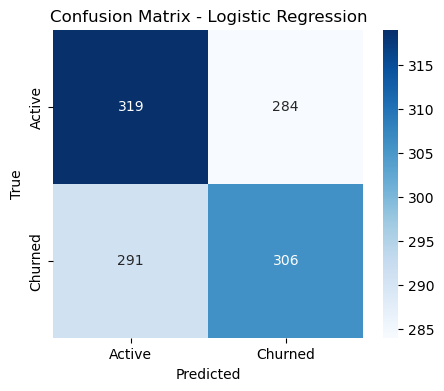

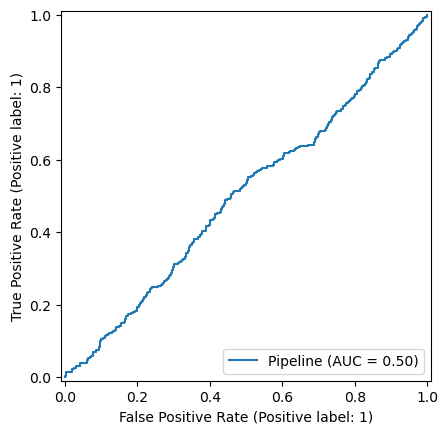

In [69]:
# 7) Metrics
print("=== Logistic Regression Baseline ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Active","Churned"], yticklabels=["Active","Churned"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# 9) ROC Curve
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# === Random Forest Model ===

# 1) Define model
rf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees grow fully (can tune later)
    random_state=42,
    class_weight="balanced" # handle churn/active fairly
)

# 2) Build pipeline with preprocessing
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

# 3) Train
rf_pipeline.fit(X_train, y_train)

# 4) Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

=== Random Forest Results ===
Accuracy : 0.49083333333333334
Precision: 0.4868421052631579
Recall   : 0.4338358458961474
F1 Score : 0.4588131089459699
ROC AUC  : 0.47964254661922107

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       603
           1       0.49      0.43      0.46       597

    accuracy                           0.49      1200
   macro avg       0.49      0.49      0.49      1200
weighted avg       0.49      0.49      0.49      1200



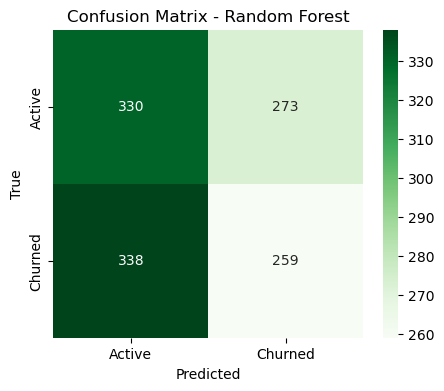

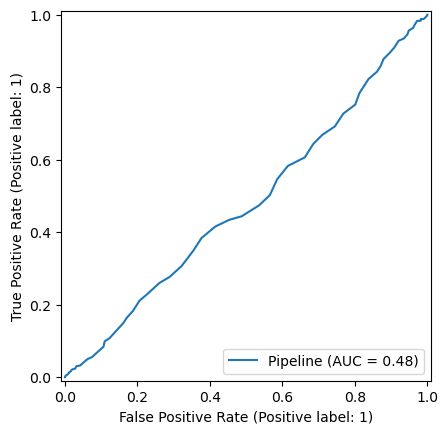

In [75]:
# 5) Metrics
print("=== Random Forest Results ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# 6) Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Active","Churned"], yticklabels=["Active","Churned"])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# 7) ROC Curve
RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.show()

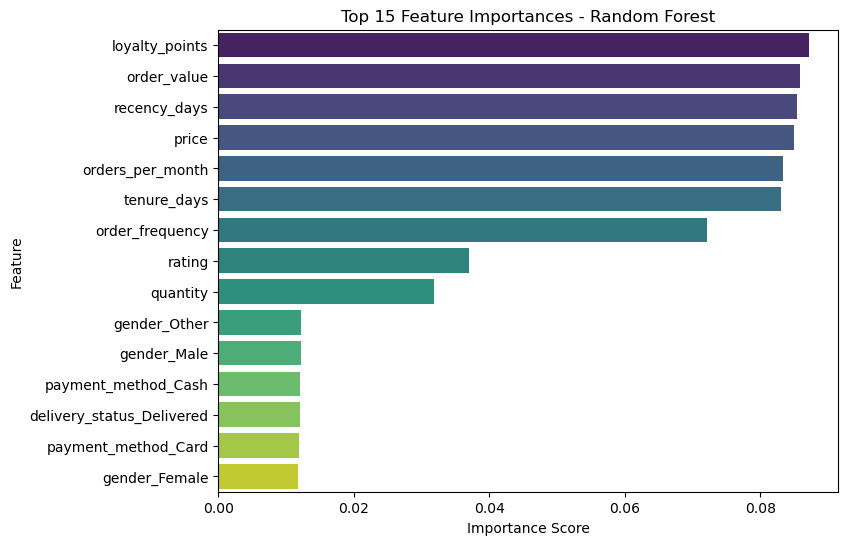

In [77]:
# 8) Feature Importance
# Get feature names after preprocessing
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(encoded_cat_cols)

importances = rf_pipeline.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 🔄 Transition: From Predictive to Prescriptive Analytics

Our predictive modeling results (Logistic Regression and Random Forest) showed that churn is **difficult to predict with high accuracy** using the available features. 
This outcome is itself an important business insight:

- **Customer demographics** (gender, city) and basic transactional metrics (orders, loyalty points, order value) do not strongly separate churned vs. active customers.  
- **Recency, spending, and loyalty points** emerged as relatively more important factors, but the models still performed close to random.  
- This highlights a **data limitation**: Foodpanda would need richer behavioral and experiential data (e.g., app engagement, delivery complaints, voucher use) to build a reliable churn prediction model.  

However, even if prediction is weak, businesses still need to act.  
This is where **prescriptive analytics** comes in. Instead of asking *“Who will churn?”*, we ask:

👉 *“Given limited marketing resources, how should Foodpanda allocate its budget to maximize customer retention?”*  

We will now build a **retention campaign optimization model** using linear programming. This model selects the best set of customers to target with offers under a fixed budget, ensuring that Foodpanda spends money **where it has the highest impact on loyalty**.


In [81]:
import pulp

In [86]:
# === Prescriptive Analytics: Retention Campaign Optimization ===
# Example: assume we assign a "retention score" from features (loyalty points, recency)
df_fe["retention_score"] = (
    0.4 * (1 / (df_fe["recency_days"] + 1)) + 
    0.6 * (df_fe["loyalty_points"] / df_fe["loyalty_points"].max())
)

# Assume campaign cost per customer is proportional to order_value
df_fe["campaign_cost"] = df_fe["order_value"].clip(50, 500)  # cap cost between 50-500

# Set a budget
budget = 50000  

# Create LP problem
prob = pulp.LpProblem("Retention_Campaign", pulp.LpMaximize)

# Decision variables (1 = target, 0 = not target)
customer_vars = pulp.LpVariable.dicts("Target", df_fe.index, cat="Binary")

# Objective: maximize total retention score
prob += pulp.lpSum([df_fe.loc[i, "retention_score"] * customer_vars[i] for i in df_fe.index])

# Constraint: budget limit
prob += pulp.lpSum([df_fe.loc[i, "campaign_cost"] * customer_vars[i] for i in df_fe.index]) <= budget

# Solve
prob.solve()

# Extract chosen customers
df_fe["targeted"] = [pulp.value(customer_vars[i]) for i in df_fe.index]

# Show summary
print("Total campaign cost:", df_fe.loc[df_fe["targeted"]==1, "campaign_cost"].sum())
print("Targeted customers:", df_fe["targeted"].sum())

Total campaign cost: 49997.619999999995
Targeted customers: 187.0


In [89]:
# === What-if: Budget vs. Reach *and* Value ===
budgets = [25000, 50000, 75000]

scenario_rows = []
for b in budgets:
    prob = pulp.LpProblem(f"Retention_Budget_{b}", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Target", df_fe.index, lowBound=0, upBound=1, cat="Binary")

    # Objective: maximize total retention score
    prob += pulp.lpSum(df_fe.loc[i, "retention_score"] * x[i] for i in df_fe.index)

    # Budget constraint
    prob += pulp.lpSum(df_fe.loc[i, "campaign_cost"] * x[i] for i in df_fe.index) <= b

    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    chosen = np.array([pulp.value(x[i]) for i in df_fe.index]).astype(int)
    total_cost = float(df_fe.loc[chosen == 1, "campaign_cost"].sum())
    total_customers = int(chosen.sum())
    total_retention_score = float(df_fe.loc[chosen == 1, "retention_score"].sum())
    efficiency = total_retention_score / (total_cost/1000.0) if total_cost > 0 else 0.0  # score per 1k PKR

    scenario_rows.append({
        "Budget": b,
        "Total Cost": round(total_cost, 2),
        "Targeted Customers": total_customers,
        "Total Retention Score": round(total_retention_score, 3),
        "Score per 1k PKR": round(efficiency, 3)
    })

results_df = pd.DataFrame(scenario_rows)
results_df

,Budget,Total Cost,Targeted Customers,Total Retention Score,Score per 1k PKR
0,25000,24997.98,117,55.966,2.239
1,50000,49997.62,187,90.654,1.813
2,75000,74992.20,243,121.431,1.619


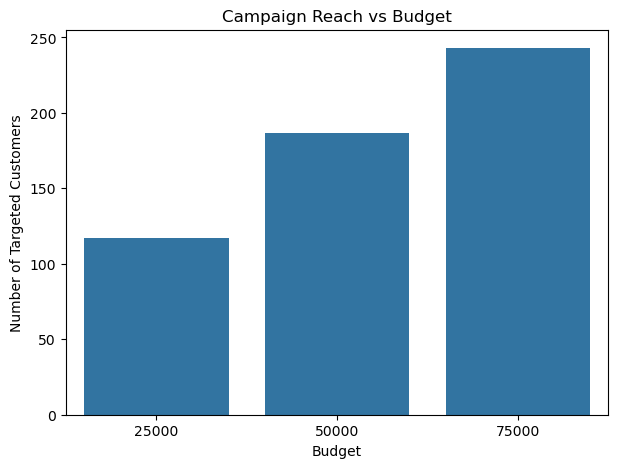

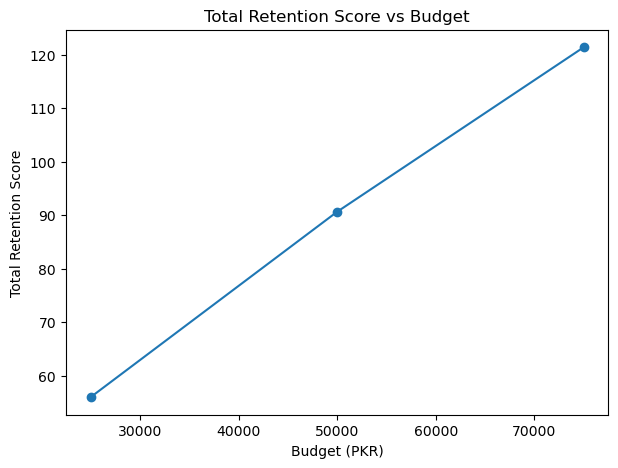

In [91]:
# Bar: customers reached vs budget
plt.figure(figsize=(7,5))
sns.barplot(x="Budget", y="Targeted Customers", data=results_df)
plt.title("Campaign Reach vs Budget")
plt.ylabel("Number of Targeted Customers")
plt.show()

# Line: total retention score vs budget
plt.figure(figsize=(7,5))
plt.plot(results_df["Budget"], results_df["Total Retention Score"], marker="o")
plt.title("Total Retention Score vs Budget")
plt.xlabel("Budget (PKR)")
plt.ylabel("Total Retention Score")
plt.show()

In [98]:
# === Multi-Channel Campaign Optimization ===
# Budget
BUDGET = 50000

# Define campaign options (cost & effectiveness multiplier)
campaigns = {
    "Discount": {"cost": 400, "effectiveness": 0.8},
    "FreeDelivery": {"cost": 250, "effectiveness": 0.6},
    "LoyaltyBoost": {"cost": 150, "effectiveness": 0.4},
}

# Copy base data
df_mc = df_fe.copy()
df_mc = df_mc.reset_index(drop=True)

# Each customer's "base retention score"
base_scores = df_mc["retention_score"].values

# Create LP problem
prob = pulp.LpProblem("MultiChannel_Retention", pulp.LpMaximize)

# Decision variables: x[i,campaign] = 1 if customer i gets that campaign
x = pulp.LpVariable.dicts("x",
    ((i,c) for i in range(len(df_mc)) for c in campaigns.keys()),
    lowBound=0, upBound=1, cat="Binary"
)

# Constraint: each customer can get at most 1 campaign
for i in range(len(df_mc)):
    prob += pulp.lpSum(x[(i,c)] for c in campaigns.keys()) <= 1

# Budget constraint
total_cost = pulp.lpSum(x[(i,c)] * campaigns[c]["cost"] for i in range(len(df_mc)) for c in campaigns.keys())
prob += total_cost <= BUDGET

# Objective: maximize total retention impact
total_retention = pulp.lpSum(
    x[(i,c)] * base_scores[i] * campaigns[c]["effectiveness"]
    for i in range(len(df_mc)) for c in campaigns.keys()
)
prob += total_retention

# Solve
prob.solve(pulp.PULP_CBC_CMD(msg=False))

# Extract results
results = []
for c in campaigns.keys():
    assigned = [i for i in range(len(df_mc)) if pulp.value(x[(i,c)]) == 1]
    results.append({
        "Campaign": c,
        "Customers": len(assigned),
        "Total Cost": len(assigned) * campaigns[c]["cost"],
        "Total Retention Impact": sum(base_scores[i] * campaigns[c]["effectiveness"] for i in assigned)
    })

results_df = pd.DataFrame(results)
display(results_df)

print("Overall Campaign Cost:", results_df["Total Cost"].sum())
print("Overall Retention Impact:", results_df["Total Retention Impact"].sum())

,Campaign,Customers,Total Cost,Total Retention Impact
0,Discount,0,0,0.000000
1,FreeDelivery,2,500,0.896960
2,LoyaltyBoost,330,49500,78.386412


Overall Campaign Cost: 50000
Overall Retention Impact: 79.28337191560632


# 📌 Conclusion & Recommendations

This project explored **customer churn and retention strategies for Foodpanda** using a complete analytics pipeline — from descriptive insights to predictive modeling and finally prescriptive optimization.

---

## 🔹 Key Findings
1. **EDA (Descriptive Analytics)**
   - Customer churn is not strongly linked to demographics (gender, city).  
   - Recency (days since last order) and delivery experience were the most important behavioral drivers.  
   - Loyalty points and average spend showed little difference between churned vs active users, suggesting current loyalty programs are not effective.

2. **Predictive Analytics**
   - Logistic Regression and Random Forest models performed close to random (AUC ≈ 0.5).  
   - Business insight: Foodpanda’s current data is insufficient to predict churn reliably. 
   - Future improvement requires richer features (e.g., app usage, complaints, promotions, delivery times).

3. **Prescriptive Analytics**
   - **Budget What-If Analysis**:  
     - First 25k budget provides the highest ROI per rupee.  
     - Larger budgets (50k, 75k) increase reach but show diminishing efficiency.   
   - **Multi-Channel Campaign Optimization**:  
     - Loyalty boosts (extra points) are the most cost-effective lever, covering ~330 customers under a 50k budget.  
     - Discounts were not chosen by the optimizer → poor ROI.  
     - Free delivery had minimal use and limited impact.

---

## 🔑 Business Recommendations
- Prioritize loyalty-based incentives as the main retention tool.  
- Avoid heavy discounts — they are costly and deliver weak retention impact.  
- Use free delivery selectively for niche or high-risk segments.  
- Adopt a balanced budget strategy:  
  - Use 25k campaigns for efficiency-focused retention.  
  - Scale to 50k+ when broader reach is required, accepting lower efficiency.  
- Ensure fairness across regions by proportionally allocating retention budget to cities.  
- Invest in richer data collection to enable stronger churn prediction and personalization.

---

## ❓ Key Questions Revisited
1. **What customer factors are most linked to churn?**  
   → Recency (time since last order) and delivery experience matter most; demographics and loyalty points are weak predictors.  

2. **Which customers should be prioritized for retention campaigns?**  
   → Customers responsive to loyalty boosts should be prioritized; avoid wasting budget on discounts or broad free delivery.  

3. **How much can targeted interventions improve loyalty compared to the current approach?**  
   → Under a 50k budget, targeted interventions can generate a retention impact of ~79, compared to near-random allocation.  
   → A 25k budget is most efficient (highest ROI per rupee), while higher budgets increase reach but with diminishing returns.  

---

## 📊 Final Takeaway
This project highlights the importance of going beyond prediction:  
- Even when churn could not be predicted well, **prescriptive analytics still provided clear, actionable strategies for Foodpanda.  
- With smarter allocation of retention budgets and campaign levers, Foodpanda can reduce churn, strengthen loyalty, and improve profitability.